# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Irfan Wahyu Ramadhani
- Email: iramadhani679@gmail.com
- Id Dicoding: 

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
df = pd.read_csv(
    "employee_data.csv",
    encoding='windows-1252'
)
df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


### Employee Data

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeId** - Employee Identifier
* **Attrition** - Did the employee attrition? (0=no, 1=yes)
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Daily salary
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Hourly salary
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly salary
* **MonthlyRate** - Mounthly rate
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

## Acknowledgements
https://www.ibm.com/communities/analytics/watson-analytics-blog/watson-analytics-use-case-for-hr-retaining-valuable-employees/

dari analisis penjelasan data yang digunakan, analisis terhadap usia karyawan akan dilakukan. serta melakukan analisis jenis kelamin karyawan yang juga memperngaruhi pengunduran diri karyawan.

## Analisis Masalah
* faktor yang mempengaruhi tingginya attrition rate
## Fokus yang dianalisis
* Attrition
* Age
* Gender
* Over18

## Data Preparation / Preprocessing

### create database in supabase

catatan, database sudah diimport lewat metabase

In [7]:
URL = "postgresql://postgres.diglleahdhewgeyytabc:WdbyMz-5(Z6/p2&@aws-0-ap-southeast-1.pooler.supabase.com:5432/postgres"

# engine = create_engine(URL)
# df.to_sql('employee', engine)

### read table in supabase

In [8]:
engine = create_engine(URL)
df = pd.read_sql_table(table_name="employee", con=engine.connect())
df.head(5)

,index,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,...,2,80,1,7,2,3,6,2,1,2
1,1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,...,1,80,0,15,2,1,1,0,0,0
2,2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,...,3,80,3,18,2,4,10,0,2,7
3,3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,...,4,80,1,23,2,4,20,4,4,8
4,4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,...,2,80,3,20,2,3,5,3,0,2


### check info from database

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1470 non-null   int64  
 1   EmployeeId                1470 non-null   int64  
 2   Age                       1470 non-null   int64  
 3   Attrition                 1058 non-null   float64
 4   BusinessTravel            1470 non-null   object 
 5   DailyRate                 1470 non-null   int64  
 6   Department                1470 non-null   object 
 7   DistanceFromHome          1470 non-null   int64  
 8   Education                 1470 non-null   int64  
 9   EducationField            1470 non-null   object 
 10  EmployeeCount             1470 non-null   int64  
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1470 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 14  JobInvol

### check null value every columns

In [10]:
df.isna().sum()

index                         0
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLife

sekilas terlihat banyak value yang kosong pada kolom utama yang akan kita analisis, yaitu `Attrition`

### Feature Selection

In [11]:
column = ['EmployeeId', 'Age', 'Attrition', 'Gender', 'Over18']

df = df[column]
df.head()

,EmployeeId,Age,Attrition,Gender,Over18
0,1,38,NaN,Male,Y
1,2,37,1.0,Female,Y
2,3,51,1.0,Male,Y
3,4,42,0.0,Female,Y
4,5,40,NaN,Female,Y


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeId  1470 non-null   int64  
 1   Age         1470 non-null   int64  
 2   Attrition   1058 non-null   float64
 3   Gender      1470 non-null   object 
 4   Over18      1470 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 57.6+ KB


terlihat kalau tipe data Gender dan Over18 bukan numerik

In [13]:
print(df['Gender'].unique())
print(df['Over18'].unique())

['Male' 'Female']
['Y']


terlihat bahwa `Gender` hanya terdapat 2 value, yaitu 'Male', dan 'Female. kita dapat replace dengan angka 1 untuk 'Male', dan angka 0 untuk 'Female'
serta kolom `Over18` ternyata hanya terdapat 1 unik value 'Y'. maka kita dapat asumsikan bahwa lingkup analisis kita hanya di karyawan berusia diatas 18 tahun. maka kolom `Over18` bisa kita abaikan

In [14]:
column = ['EmployeeId', 'Age', 'Attrition', 'Gender']

df = df[column]
df.head()

,EmployeeId,Age,Attrition,Gender
0,1,38,NaN,Male
1,2,37,1.0,Female
2,3,51,1.0,Male
3,4,42,0.0,Female
4,5,40,NaN,Female


hapus kolom Over18

### change type data `Gender`

In [15]:
df['Gender'] = df['Gender'].astype(str)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.head()

,EmployeeId,Age,Attrition,Gender
0,1,38,NaN,1
1,2,37,1.0,0
2,3,51,1.0,1
3,4,42,0.0,0
4,5,40,NaN,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeId  1470 non-null   int64  
 1   Age         1470 non-null   int64  
 2   Attrition   1058 non-null   float64
 3   Gender      1470 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 46.1 KB


semua kolom sudah berisi value numerik, sekarang kita akan manipulasi kolom yang berisi data null

In [17]:
df.isna().sum()

EmployeeId      0
Age             0
Attrition     412
Gender          0
dtype: int64

data `Attrition` banyak value yang kosong

In [18]:
100*df.isna().sum()/len(df)

EmployeeId     0.000000
Age            0.000000
Attrition     28.027211
Gender         0.000000
dtype: float64

terlihat bahwa null value kurang dari 0.5 persen dari `Attrition`. maka akan dipakai drop

In [19]:
df.dropna(inplace=True)
df.isna().sum()

EmployeeId    0
Age           0
Attrition     0
Gender        0
dtype: int64

sekarang data null sudah teratasi

## Exploratory Data Analysis

### Describe Data

In [20]:
df.describe()

,EmployeeId,Age,Attrition,Gender
count,1058.000000,1058.000000,1058.000000,1058.000000
mean,736.656900,37.055766,0.169187,0.586011
std,427.440538,9.410421,0.375094,0.492779
min,2.000000,18.000000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,0.000000
50%,731.500000,36.000000,0.000000,1.000000
75%,1117.750000,43.000000,0.000000,1.000000
max,1470.000000,60.000000,1.000000,1.000000


sebaran data sudah terlihat normal, menandakan outlier sudah tidak ada. data bisa diproses

### Show distribution Data

show distribusi data kecuali `EmployeeID`

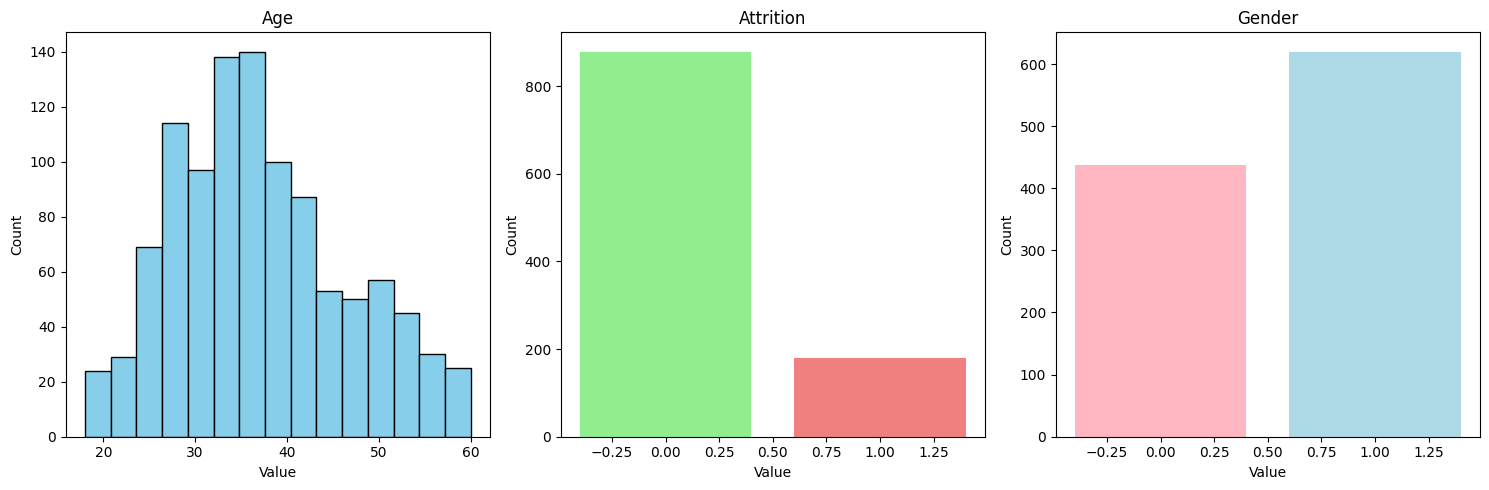

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age')
plt.xlabel('Value')
plt.ylabel('Count')

attrition_counts = df['Attrition'].value_counts()

plt.subplot(1, 3, 2)
plt.bar(attrition_counts.index, attrition_counts.values, color=['lightgreen', 'lightcoral'])
plt.title('Attrition')
plt.xlabel('Value')
plt.ylabel('Count')

gender_counts = df['Gender'].value_counts()

plt.subplot(1, 3, 3)
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink'])
plt.title('Gender')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

dari distribusi terlihat, terdapat beberapa hal yang bisa dianalisis.
* kebanyakan usia karyawan berada di rentang 30 - 40
* lebih sedikit karyawan yang melakukan pengunduran diri
* lebih banyak karyawan Male daripada Female

### Relationship between Age and Attrition

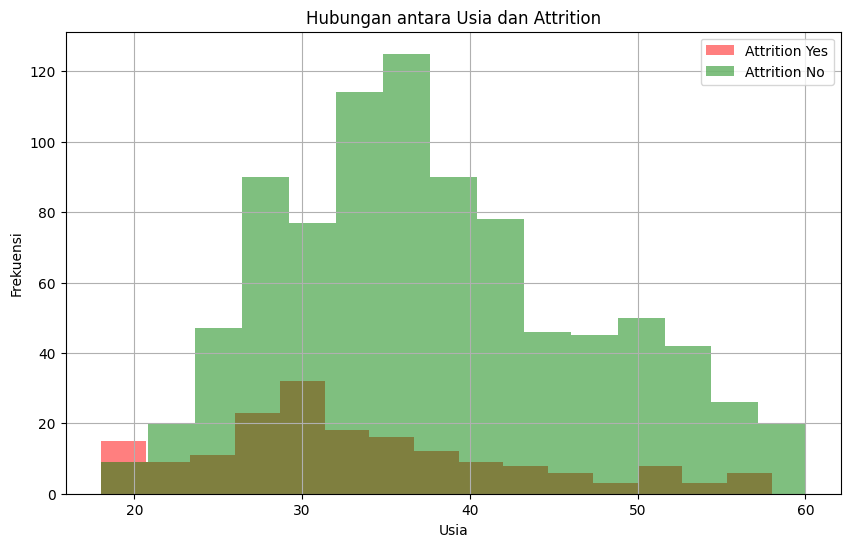

In [23]:
attrition_yes = df[df['Attrition'] == 1]['Age']
attrition_no = df[df['Attrition'] == 0]['Age']

plt.figure(figsize=(10, 6))
plt.hist(attrition_yes, bins=15, color='red', alpha=0.5, label='Attrition Yes')
plt.hist(attrition_no, bins=15, color='green', alpha=0.5, label='Attrition No')
plt.title('Hubungan antara Usia dan Attrition')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.show()


ternyata usia dibawah 20 tahun mempunyai nilai attrition Yes yang melebihi yang No
ini justru menjadi tanda tanya. serta jumlah yang lumayan pada usia sekitar 30-an tahun, walau tidak sebanyak attrition No.

### Relationship between Gender and Attrition

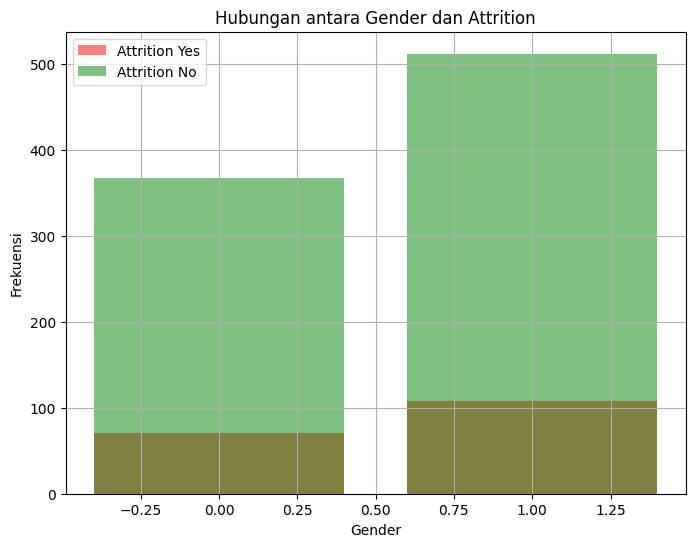

In [24]:
attrition_yes = df[df['Attrition'] == 1]['Gender']
attrition_no = df[df['Attrition'] == 0]['Gender']

gender_counts_yes = attrition_yes.value_counts()
gender_counts_no = attrition_no.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts_yes.index, gender_counts_yes.values, color='red', alpha=0.5, label='Attrition Yes')
plt.bar(gender_counts_no.index, gender_counts_no.values, color='green', alpha=0.5, label='Attrition No')
plt.title('Hubungan antara Gender dan Attrition')
plt.xlabel('Gender')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.show()

terlihat bahwa jumlah karyawan Male yang mengundurkan diri lebih banyak sedikit daripada karyawan Female

### Relationship between Gender and Age

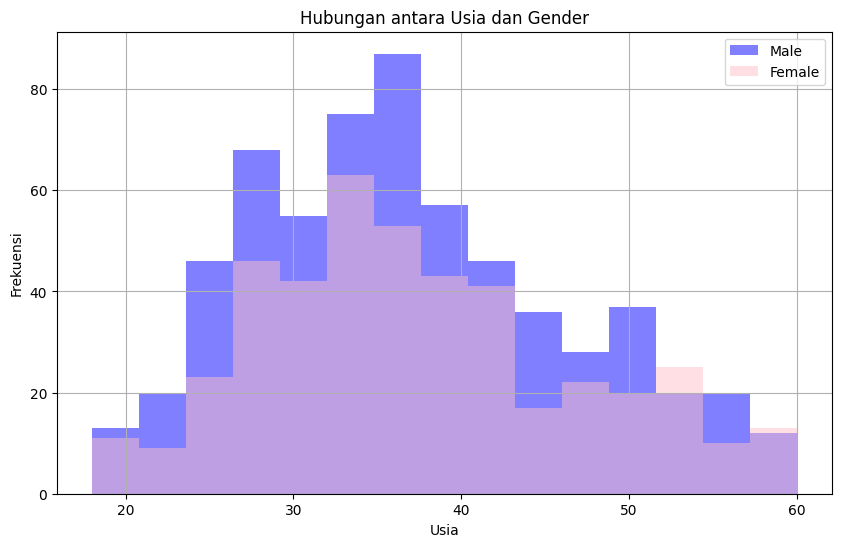

In [25]:
male_age = df[df['Gender'] == 1]['Age']
female_age = df[df['Gender'] == 0]['Age']

plt.figure(figsize=(10, 6))
plt.hist(male_age, bins=15, color='blue', alpha=0.5, label='Male')
plt.hist(female_age, bins=15, color='pink', alpha=0.5, label='Female')
plt.title('Hubungan antara Usia dan Gender')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.show()


terlihat perbandingan Gender yang significant pada usia antara 30 - 40 tahun

dari EDA bisa dilihat bahwa usia dibawah 20 tahun memiliki kerentanan pengunduran diri, dan jenis kelamin Male memiliki grafik pengunduran diri yang lummayan dibandingkan Female

sehingga, disarankan untuk mengelompokkan golongan yang memiliki potensi pengunduran diri yang lumayan.
akan dilakukan clustering `EmployeeID` berdasarkan usia karyawan.

## Modeling

In [40]:
X = pd.get_dummies(df,dtype='int')
X.head()

,EmployeeId,Age,Attrition,Gender
1,2,37,1.0,0
2,3,51,1.0,1
3,4,42,0.0,0
6,7,40,0.0,1
7,8,55,1.0,1


In [41]:
list_innertia   = []
list_silhouette = []
list_cluster    = []

for k in range(2,11):
    cluster_model = KMeans(n_clusters=k)
    cluster_model.fit(X)

    labels = cluster_model.labels_

    sil_score = silhouette_score(X,labels)
    inn_score = cluster_model.inertia_

    list_cluster.append(k)
    list_silhouette.append(sil_score)
    list_innertia.append(inn_score)

f:\IDCAMP_DICODING\kelas_mahir\.env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\IDCAMP_DICODING\kelas_mahir\.env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\IDCAMP_DICODING\kelas_mahir\.env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\IDCAMP_DICODING\kelas_mahir\.env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\IDCAMP_DI

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
k = 3
final_model = KMeans(n_clusters=k,random_state=42)
final_model.fit(X_scaled)

f:\IDCAMP_DICODING\kelas_mahir\.env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

### Save Model

In [44]:
# joblib.dump(final_model, 'kmeans_model.joblib')

['kmeans_model.joblib']

## Evaluation

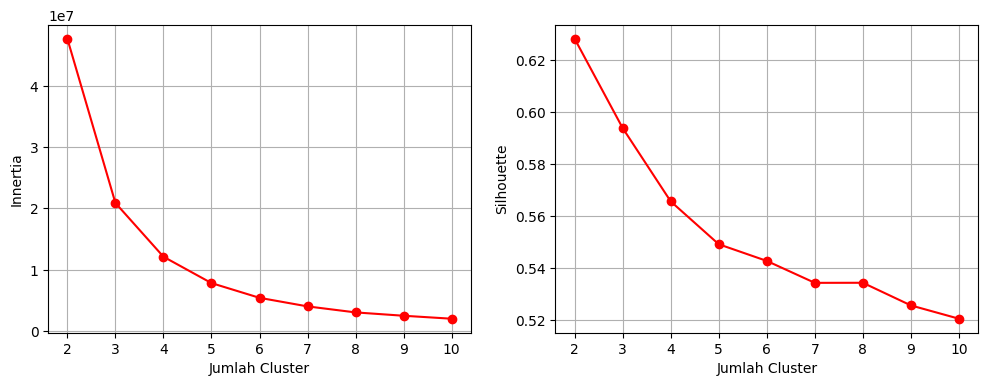

In [45]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(list_cluster,list_innertia,'r-o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Innertia')
plt.grid()

plt.subplot(122)
plt.plot(list_cluster,list_silhouette,'r-o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette')
plt.grid()

tampak nilai inertia dan silhoutte sudah bagus

In [46]:
inertia = final_model.inertia_
print("Inertia:", inertia)

silhouette_avg = silhouette_score(X_scaled, final_model.labels_)
print("Silhouette Score:", silhouette_avg)

Inertia: 2257.6211309701935
Silhouette Score: 0.35766422755972005


nilai inertia dan silhoutte menunjukkan angka yang cukup baik, terutama silhoutte score yang menunjukkan angka positif. ini menunjukkan bahwa model sudah cukup bagus untuk kasus clustering

### create new column `cluster`

In [52]:
df = pd.DataFrame(X)
df['cluster'] = final_model.labels_
df.head()

,EmployeeId,Age,Attrition,Gender,cluster
1,2,37,1.0,0,1
2,3,51,1.0,1,1
3,4,42,0.0,0,0
6,7,40,0.0,1,2
7,8,55,1.0,1,1


In [53]:
df['cluster'].value_counts(normalize=True)

cluster
2    0.483932
0    0.346881
1    0.169187
Name: proportion, dtype: float64

In [54]:
col_to_check = ['Age', 'Attrition', 'Gender']
baseline = df[col_to_check].describe().T['mean']
baseline

Age          37.055766
Attrition     0.169187
Gender        0.586011
Name: mean, dtype: float64

In [55]:
df_cluster = df.groupby('cluster').mean().T
df_cluster

cluster,0,1,2
EmployeeId,755.681199,719.698324,728.949219
Age,38.373297,33.469274,37.365234
Attrition,0.000000,1.000000,0.000000
Gender,0.000000,0.603352,1.000000


In [56]:
df_percentage = baseline.to_frame()
for i in range(k):
    df_percentage[i] = df_cluster[i]/baseline

df_percentage

,mean,0,1,2
Age,37.055766,1.035555,0.903214,1.008351
Attrition,0.169187,0.000000,5.910615,0.000000
Gender,0.586011,0.000000,1.029591,1.706452


### Kesimpulan

dari hasil evaluasi cluster dan modelling, dapat disimpulkan bahwa
* terdapat 3 cluster yang sengaja dibuat yaitu untuk pengelompokan 3 karyawan berdasarkan usia, yaitu yang beresiko terhadap pengunduran diri
* cluster 0 dan 2 merupakan cluster yang memiliki resiko pengunduran tidak terlalu significant berdasarkan persentase usia dan gendernya.
* cluster 1 adalah yang harus diperhatikan, karena memiliki persentase pengunduran diri yang lumayan significant

# Saran pada perusahaan

lebih perhatikan pada karyawan yang berada di cluster 1, yang memiliki persentase pengunduran diri yang lumayan significant. perhatian mungkin bisa diperhatikan pada karyawan yang usianya termasuk dalam cluster 1. sehingga kemungkinan resiko pengunduran diri bisa berkurang